In [190]:
from PIL import Image
import numpy as np

### chair의 이미지 해상도 통일하여 적용하기 test

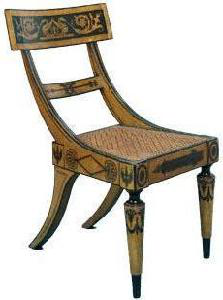

In [191]:
# image 불러오기
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [192]:
np.array(img).shape
# 3 => rgb 

(300, 223, 3)

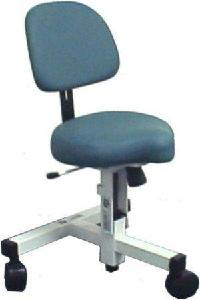

In [193]:
img = Image.open("../Data/cnn/chair/image_0002.jpg")
img

In [194]:
np.array(img).shape
# 튜플 
# 행 열 높이(컬러)

(300, 200, 3)

In [195]:
# 너비 해상도 
np.array(img).shape[1]

200


---
## chair 전체 이미지의 해상도의 평균 구하기

In [196]:
import glob

In [197]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    # image open
    img = np.array(Image.open(file),dtype=np.int32)
    # width 크기 가져오기 
    widthRatio.append(img.shape[1])
    # height 크기 가져오기 
    heightRatio.append(img.shape[0])

In [198]:
print("chair의 너비 평균 해상도 :", np.max(widthRatio))
print("chair의 너비 높이 해상도 :", np.max(heightRatio))

chair의 너비 평균 해상도 : 300
chair의 너비 높이 해상도 : 300


In [199]:
# 갯수 확인
print(len(widthRatio),len(heightRatio))

62 62


> 너비 : 231, 높이: 297

---
## Chair의 이미지 해상도 변경 및 Gray Scale로 적용하기 

In [200]:
# laptop은 81개, chair의 파일갯수는 62개이므로 지도학습이라 같은 비율로 학습해야 좋으므로 60개 맞추기

i = 0

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = Image.open(file)
    # 해상도 조절
    imgResize = img.resize((300,300), Image.LANCZOS)
    #  Image.LANCZOS = > image processing
    imgResize = imgResize.convert("L") # grayscale(흑백), 투명도 있는경우 LA
    # 이미지 저장
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i,"JPEG")
    i += 1
    if i >= 60:
        break

---
# Laptop의 이미지 해상도 변경 및 grayscale로 적용하기

In [201]:
i = 0

for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    # 해상도 조절
    imgResize = img.resize((300,300), Image.LANCZOS)
    #  Image.LANCZOS = > image processing
    imgResize = imgResize.convert("L") # grayscale(흑백), 투명도 있는경우 LA
    # 이미지 저장
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i,"JPEG")
    i += 1
    if i >= 60:
        break

---
# chair 이미지를 numpy로 변경하기 

In [202]:
# 하나의 빈 배열(0)이 있어야 numpy로 들어감. 그러면 검은 화면
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [203]:
# 0으로 구성된 배열 생성 (1차원 => 3차원 )
chairData = np.zeros(number_of_data * img_width_size * img_height_size,dtype=np.int32).reshape(number_of_data,img_height_size,img_width_size)

In [204]:
chairData.shape
# 갯수, 가로(행), 세로(컬럼) 


(60, 350, 350)

In [205]:
i = 0
# 파일 open
for file in sorted(glob.glob("../Data/cnn/chairNew/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    chairData[i,25:-25,25:-25] = img
    i+=1
    

In [206]:
chairData.shape

(60, 350, 350)

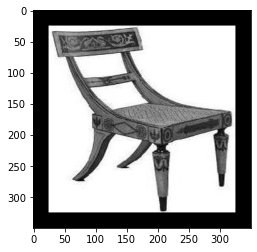

In [207]:
# 시각화 
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(350,350),cmap="gray")
plt.show()

---
# laptop image를 numpy로 변경하기 

In [208]:
laptopData =  np.zeros(number_of_data * img_width_size * img_height_size,dtype=np.int32).reshape(number_of_data,img_height_size,img_width_size)

In [209]:
laptopData.shape

(60, 350, 350)

In [210]:
i = 0
# 파일 open
for file in sorted(glob.glob("../Data/cnn/laptopNew/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    laptopData[i,25:-25,25:-25] = img
    i+=1
    

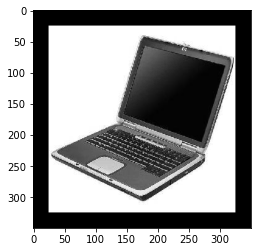

In [211]:
# 시각화
import matplotlib.pyplot as plt

plt.imshow(laptopData[0].reshape(350,350),cmap="gray")
plt.show()

---
## Numpy data를 train data로 합치기
## 학습시키기 

In [212]:
train = np.concatenate([chairData,laptopData])
train.shape


(120, 350, 350)

In [213]:
# target data
target = np.concatenate([np.zeros(60),np.ones(60)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [214]:
# 표준화  
train = train.reshape(-1,350,350,1) /  255.0

In [215]:
train.shape
# channel 차원 추가 

(120, 350, 350, 1)

In [216]:

from sklearn.model_selection import train_test_split
# train, valid
train_input, val_input, train_target, val_target= train_test_split(
               train,target, test_size = 0.2,random_state=77
)
# train,test
trainData, testData, trainTargetData,testTargetData = train_test_split(
    train_input,train_target, test_size = 0.2,random_state=77
)

---
# CNN 만들기

In [217]:
# 합성곱층
from tensorflow import keras

In [218]:
# 모델 만들기
model = keras.Sequential()

In [219]:
# 1 
# same padding, 같은 사이즈의 특성맵 생성 
model.add(
    keras.layers.Conv2D(
        32, # 필터의 갯수
        kernel_size = 3, # 커널의 갯수 (3*3 => 홀수이여야함)
        activation = "relu",    # 활성함수(가중치를 더하는 방법)
        padding = 'same',
        input_shape = (350,350,1),   # 입력층
    )
)
# 특성맵 사이즈 (297,231,32) # 가로, 세로, 필터 

In [220]:
# 2 
# 최대풀링 (데이터 중 최대값을 택한다.(255에 가장 가까운 값))
model.add(keras.layers.MaxPooling2D(2)) # 2*2

In [221]:
# 합성곱층 2번 
# 3 
# 합성곱층 
model.add(
    keras.layers.Conv2D(
        64, # 필터의 갯수
        kernel_size = 3, # 커널의 갯수 (3*3 => 홀수이여야함)
        activation = "relu",    # 활성함수(가중치를 더하는 방법)
        padding = 'same',
    )
)

In [222]:
# 4 
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))# 2*2

In [223]:
# 쓰는 순서에 따라 모델이 추가되므로 순서에 유의한다.

# 풀링층을 1차원으로 변형 
model.add(keras.layers.Flatten())
# 밀집층 => 은닉층 
# 입력층보다 많아야 한다.
model.add(keras.layers.Dense(100,activation="relu"))

# 일부 탈락(과대적합 방지)
model.add(keras.layers.Dropout(0.7))
# 출력층 
model.add(keras.layers.Dense(2,activation="sigmoid"))

In [224]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 175, 175, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 484416)            0         
                                                                 
 dense_8 (Dense)             (None, 30)               

In [225]:
# 훈련
model.compile(
    optimizer = "adam",
    # 손실함수
    loss = "sparse_categorical_crossentropy", # 출력층은 숫자분류 => 0~9
    metrics = "accuracy"
)
# 손실값이 적은 함수 저장 
checkpoint_db= keras.callbacks.ModelCheckpoint("../Data/cnn/best_model.h5")
# 최적의 값을 찾으면 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(
    trainData,
    trainTargetData,
    epochs=50,
    validation_data=(val_input,val_target),
    callbacks = [checkpoint_db,early_stopping_cb]
)

Epoch 1/50
3/3 [==============================] - 11s 3s/step - loss: 4.5718 - accuracy: 0.5263 - val_loss: 2.2987 - val_accuracy: 0.5833
Epoch 2/50
3/3 [==============================] - 12s 5s/step - loss: 3.5093 - accuracy: 0.4605 - val_loss: 1.3112 - val_accuracy: 0.4167
Epoch 3/50
3/3 [==============================] - 8s 3s/step - loss: 0.9813 - accuracy: 0.4474 - val_loss: 0.7038 - val_accuracy: 0.4167
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 0.6670 - accuracy: 0.6053 - val_loss: 0.6857 - val_accuracy: 0.5833
Epoch 5/50
3/3 [==============================] - 9s 3s/step - loss: 0.6841 - accuracy: 0.4737 - val_loss: 0.6834 - val_accuracy: 0.7083
Epoch 6/50
3/3 [==============================] - 8s 3s/step - loss: 0.6754 - accuracy: 0.5395 - val_loss: 0.7232 - val_accuracy: 0.4167
Epoch 7/50
3/3 [==============================] - 8s 3s/step - loss: 0.6481 - accuracy: 0.5789 - val_loss: 0.6739 - val_accuracy: 0.6250
Epoch 8/50
3/3 [=======================

In [226]:
#검증용의 손실과 정확도 
model = keras.models.load_model("../Data/cnn/best_model.h5")
model.evaluate(val_input,val_target)

1/1 [==============================] - 0s 475ms/step - loss: 0.3947 - accuracy: 0.8333


[0.3946945369243622, 0.8333333134651184]

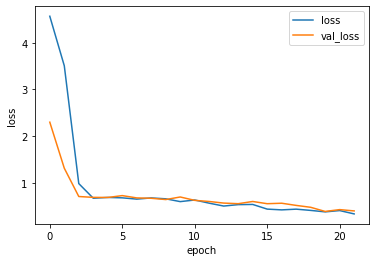

In [227]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

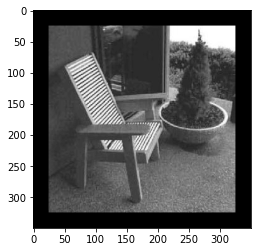

In [228]:
plt.imshow(val_input[0].reshape(350,350),cmap="gray")
plt.show()

In [229]:
import numpy as np
classes = ['노트북','의자']

In [230]:
pred = model.predict(val_input[0:1])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 89ms/step
노트북


In [231]:
test_scaled = testData.reshape(-1,350,350,1)

In [232]:
model.evaluate(test_scaled,testTargetData)

1/1 [==============================] - 0s 329ms/step - loss: 0.4832 - accuracy: 0.9000


[0.4831530451774597, 0.8999999761581421]

---
# 이미지 불러서 predict 하기 

In [233]:
img = Image.open("../Data/test.jpg")
img = img.resize((350,350),resample=Image.LANCZOS)
img = img.convert("L")

In [234]:
img = np.array(img)

In [235]:
img.shape

(350, 350)

In [236]:
img.reshape(350,350,1) / 255.0

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

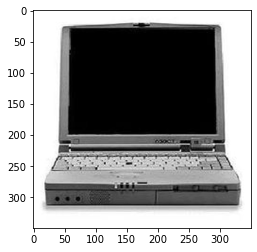

In [237]:
# 확인
plt.imshow(img.reshape(350,350),cmap="gray")
plt.show()

In [238]:
img2 = Image.open("../Data/test01.jpg")
img2 = img2.resize((350,350),resample=Image.LANCZOS)
img2 = img2.convert("L")

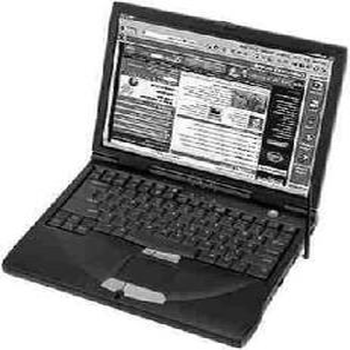

In [239]:
img2

In [240]:
img2 = np.array(img2)

In [241]:
img2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [242]:
img2.shape

(350, 350)

In [243]:
img2.reshape(350,350,1) / 255.0

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

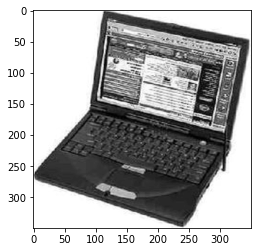

In [244]:
# 확인
plt.imshow(img2.reshape(350,350),cmap="gray")
plt.show()

---
# 피아노 추가하기 

In [245]:
i = 0

for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = Image.open(file)
    # 해상도 조절
    imgResize = img.resize((300,300), Image.LANCZOS)
    #  Image.LANCZOS = > image processing
    imgResize = imgResize.convert("L") # grayscale(흑백), 투명도 있는경우 LA
    # 이미지 저장
    imgResize.save("../Data/cnn/pianoNew/image_%04d.jpg"%i,"JPEG")
    i += 1
    if i >= 60:
        break

In [246]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [247]:
pianoData = np.zeros(number_of_data * img_width_size * img_height_size,dtype=np.int32).reshape(number_of_data,img_height_size,img_width_size)

In [248]:
pianoData.shape

(60, 350, 350)

In [249]:
# 시각화 
i = 0
# 파일 open
for file in sorted(glob.glob("../Data/cnn/pianoNew/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    pianoData[i,25:-25,25:-25] = img
    # 꼭짓점,1번과 끝나는 4번
    i+=1

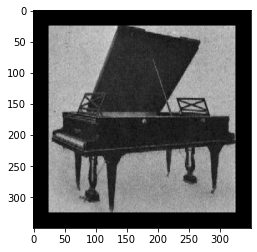

In [250]:
# 시각화
import matplotlib.pyplot as plt
# 최대값이 300이고 양쪽에 25씩 더해서 padding을 만든다
plt.imshow(pianoData[20].reshape(350,350),cmap="gray")
plt.show()

In [251]:
# chain, piano, laptop을 합치기 
train = np.concatenate([chairData,laptopData,pianoData])
train.shape

(180, 350, 350)

In [252]:
# target data
target = np.concatenate([np.zeros(60),np.ones(60),np.full(60,2)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [253]:
# 표준화  
train = train.reshape(-1,350,350,1) /  255.0

In [254]:

from sklearn.model_selection import train_test_split
# train, valid
train_input, val_input, train_target, val_target= train_test_split(
               train,target, test_size = 0.2,random_state=77
)
# train,test
trainData, testData, trainTargetData,testTargetData = train_test_split(
    train_input,train_target, test_size = 0.2,random_state=77
)

---
## Numpy data를 train data로 합치기
## 학습시키기 

In [255]:
train = np.concatenate([chairData,laptopData,pianoData])
train.shape

(180, 350, 350)

# cnn 만들기


In [256]:
model = keras.Sequential()

In [257]:
# 1 
# same padding, 같은 사이즈의 특성맵 생성 
model.add(
    keras.layers.Conv2D(
        32, # 필터의 갯수
        kernel_size = 3, # 커널의 갯수 (3*3 => 홀수이여야함)
        activation = "relu",    # 활성함수(가중치를 더하는 방법)
        padding = 'same',
        # 가운데로 모이게 하자! 
        # 입력츠의 모양을 바꾸면 된다
        input_shape = (350,350,1),   # 입력층
    )
)
# 특성맵 사이즈 (350,350,32) # 가로, 세로, 필터 

In [258]:
# 2 
# 최대풀링 (데이터 중 최대값을 택한다.(255에 가장 가까운 값))
model.add(keras.layers.MaxPooling2D(2)) # 2*2

In [259]:
# 합성곱층 2번 
# 3 
# 합성곱층 
model.add(
    keras.layers.Conv2D(
        64, # 필터의 갯수
        kernel_size = 3, # 커널의 갯수 (3*3 => 홀수이여야함)
        activation = "relu",    # 활성함수(가중치를 더하는 방법)
        padding = 'same',
    )
)

In [260]:
# 4 
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))# 2*2

In [261]:
# 쓰는 순서에 따라 모델이 추가되므로 순서에 유의한다.

# 풀링층을 1차원으로 변형 
model.add(keras.layers.Flatten())
# 밀집층 => 은닉층 
# 입력 받는 이미지갯수가 60이므로 60보다 많은 수 
model.add(keras.layers.Dense(100,activation="relu"))

# 일부 탈락(과대적합 방지)
model.add(keras.layers.Dropout(0.7))
# 출력층 
model.add(keras.layers.Dense(3,activation="softmax"))

In [262]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 175, 175, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 87, 87, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 484416)            0         
                                                                 
 dense_10 (Dense)            (None, 30)               

In [263]:
# 훈련
model.compile(
    optimizer = "adam",
    # 손실함수
    loss = "sparse_categorical_crossentropy", # 출력층은 숫자분류 => 
    metrics = "accuracy"
)
# 손실값이 적은 함수 저장 
checkpoint_db= keras.callbacks.ModelCheckpoint("../Data/cnn/best_model.h5")
# 최적의 값을 찾으면 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(
    trainData,
    trainTargetData,
    epochs=50,
    validation_data=(val_input,val_target),
    callbacks = [checkpoint_db,early_stopping_cb]
)

Epoch 1/50
4/4 [==============================] - 11s 3s/step - loss: 4.1521 - accuracy: 0.3391 - val_loss: 1.2821 - val_accuracy: 0.2778
Epoch 2/50
4/4 [==============================] - 14s 4s/step - loss: 2.1163 - accuracy: 0.3826 - val_loss: 1.0870 - val_accuracy: 0.5556
Epoch 3/50
4/4 [==============================] - 13s 4s/step - loss: 1.1040 - accuracy: 0.3826 - val_loss: 1.0754 - val_accuracy: 0.5278
Epoch 4/50
4/4 [==============================] - 14s 4s/step - loss: 1.0814 - accuracy: 0.4174 - val_loss: 1.0846 - val_accuracy: 0.3056
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 1.1180 - accuracy: 0.3652 - val_loss: 1.0793 - val_accuracy: 0.5556


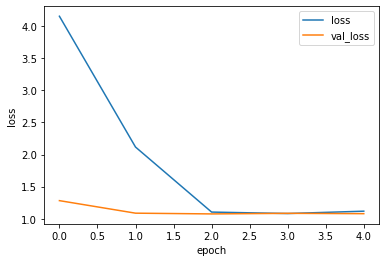

In [264]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

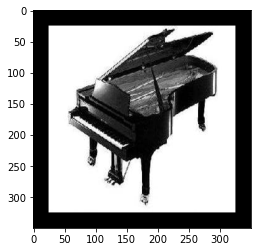

In [286]:
plt.imshow(val_input[35].reshape(350,350),cmap="gray")
plt.show()

In [287]:
import numpy as np
classes = ['의자','노트북','피아노']

In [294]:
pred = model.predict(val_input[35:36])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 44ms/step
피아노


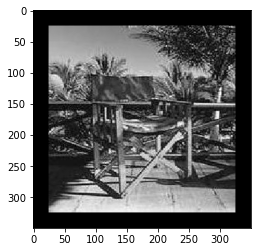

In [292]:
plt.imshow(val_input[9].reshape(350,350),cmap="gray")
plt.show()

In [295]:
pred = model.predict(val_input[9:10])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 44ms/step
의자
